In [1]:
# import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load data and change position of PIPs
data = pd.read_csv('Manipulated/2019_usd_eur.csv')
data["change"] = data["change"] * 10000

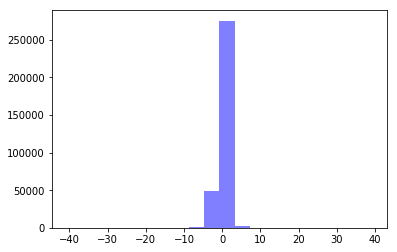

In [3]:
# Plot histogram
plt.hist(data["change"], 20, facecolor='blue', alpha=0.5)
plt.show()

In [4]:
# Serials the changes into Dataframe (data)
data1 = data.copy()
labels = ["1","2","3","4","5","6","7","8","9","10",
          "11","12","13","14","15","16","17","18","19","20",
          "21","22","23","24","25","26","27","28","29","30",
          "31","32","33","34","35","36","37","38","39","40",
          "41","42","43","44","45","46","47","48","49","50",
          "51","52","53","54","55","56","57","58","59","60"]

for i in range(60) :
    data2 = data1.drop(data1.index[0:i]).copy()
    data2 = data2.reset_index(drop=True)
    data[labels[i]] = data2["change"]

In [5]:
# Remove first and last hour
data = data.dropna()
data = data.drop(data[(data['weekday'] == 1) & (data['hour'] == 17)].index)
data = data.drop(data[(data['weekday'] == 6) & (data['hour'] == 16)].index)
data.shape

(322708, 67)

In [6]:
fininfo = pd.read_csv('Manipulated/2019_fininfo.csv')
fininfo.head()

,year,month,day,weekday,dow_open,euf_open,us_6mn
0,2018,12,3,2,2.577957,1.872,2.56
1,2018,12,4,3,2.575256,1.857,2.58
2,2018,12,6,5,2.473742,1.763,2.56
3,2018,12,7,6,2.491882,1.774,2.54
4,2018,12,10,2,2.436095,1.745,2.54


In [7]:
combined1 = pd.merge(data,fininfo,on=['year','month','day','weekday'])
combined1.head()

,year,month,day,hour,minute,weekday,change,1,2,3,...,54,55,56,57,58,59,60,dow_open,euf_open,us_6mn
0,2018,12,3,0,0,2,0.0,0.0,0.3,-0.5,...,9.0,6.5,-1.9,4.1,0.0,-0.5,-0.4,2.577957,1.872,2.56
1,2018,12,3,0,1,2,0.3,0.3,-0.5,1.2,...,6.5,-1.9,4.1,0.0,-0.5,-0.4,-1.2,2.577957,1.872,2.56
2,2018,12,3,0,2,2,-0.5,-0.5,1.2,-1.1,...,-1.9,4.1,0.0,-0.5,-0.4,-1.2,-0.1,2.577957,1.872,2.56
3,2018,12,3,0,3,2,1.2,1.2,-1.1,-0.4,...,4.1,0.0,-0.5,-0.4,-1.2,-0.1,-0.8,2.577957,1.872,2.56
4,2018,12,3,0,4,2,-1.1,-1.1,-0.4,0.5,...,0.0,-0.5,-0.4,-1.2,-0.1,-0.8,0.7,2.577957,1.872,2.56


In [8]:
combined1.shape

(296114, 70)

In [9]:
sent = pd.read_csv('Manipulated/2019_sentiment.csv')
sent.head()

,year,month,day,hour,minute,sentiment
0,2018,12,2,17,0,-0.4767
1,2018,12,2,17,1,-0.4767
2,2018,12,2,17,2,-0.4767
3,2018,12,2,17,3,-0.4767
4,2018,12,2,17,4,-0.4767


In [10]:
combined2 = pd.merge(combined1,sent,on=['year','month','day','hour','minute'])
combined2.head()

,year,month,day,hour,minute,weekday,change,1,2,3,...,55,56,57,58,59,60,dow_open,euf_open,us_6mn,sentiment
0,2018,12,3,0,0,2,0.0,0.0,0.3,-0.5,...,6.5,-1.9,4.1,0.0,-0.5,-0.4,2.577957,1.872,2.56,-0.4767
1,2018,12,3,0,1,2,0.3,0.3,-0.5,1.2,...,-1.9,4.1,0.0,-0.5,-0.4,-1.2,2.577957,1.872,2.56,-0.4767
2,2018,12,3,0,2,2,-0.5,-0.5,1.2,-1.1,...,4.1,0.0,-0.5,-0.4,-1.2,-0.1,2.577957,1.872,2.56,-0.4767
3,2018,12,3,0,3,2,1.2,1.2,-1.1,-0.4,...,0.0,-0.5,-0.4,-1.2,-0.1,-0.8,2.577957,1.872,2.56,-0.4767
4,2018,12,3,0,4,2,-1.1,-1.1,-0.4,0.5,...,-0.5,-0.4,-1.2,-0.1,-0.8,0.7,2.577957,1.872,2.56,-0.4767


In [11]:
combined2.shape

(296114, 71)

In [12]:
# Send toi csv file for use in models
combined2.to_csv('combined.csv')